In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_explode = df.explode('job_skills')

<Axes: xlabel='job_skills'>

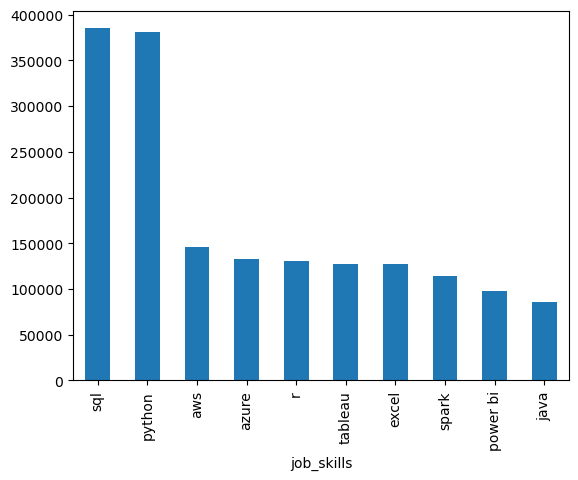

In [6]:
df_explode['job_skills'].value_counts().head(10).plot(kind='bar')

groping them by skill count and job title short column

In [10]:
df_explode.groupby(['job_skills','job_title_short']).size()


job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

Convert into dataframe

In [22]:
df_skills_count = skills_count.reset_index(name='skills_count')

df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


creating indivdual verabls

<Axes: ylabel='job_skills'>

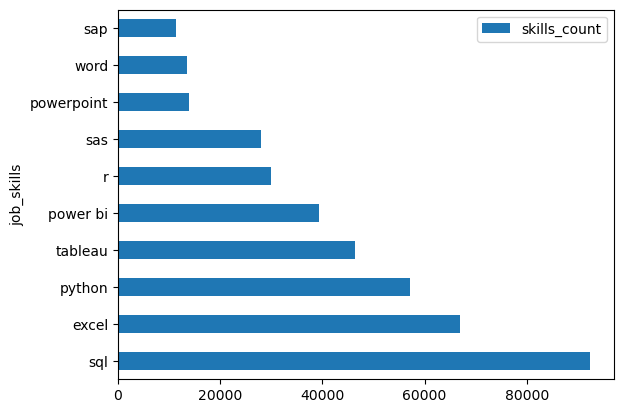

In [23]:
job_title = 'Data Analyst'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='barh', x='job_skills', y='skills_count')

Inversting the Y axis 

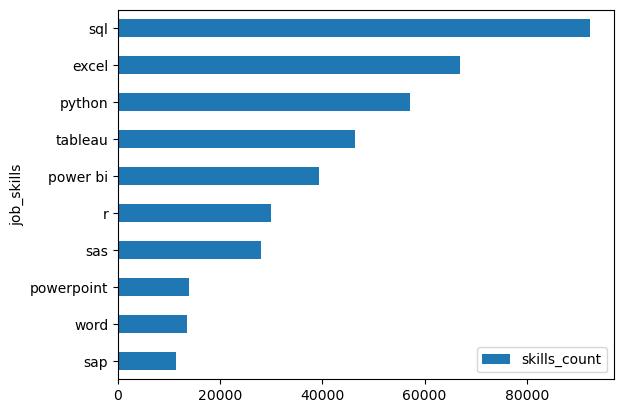

In [34]:
job_title = 'Data Analyst'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()



looking at other job titles like data engineer

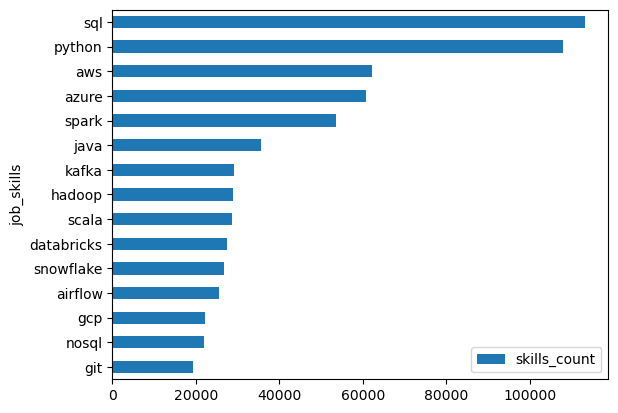

In [33]:
job_title = 'Data Engineer'
top_skills = 15

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()


clean up

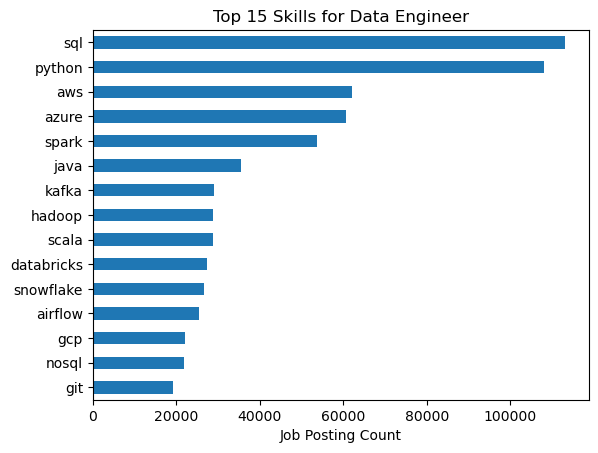

In [ ]:
job_title = 'Data Engineer'
top_skills = 15

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show
